## About the data

<b>age</b>:age in years<br>
<b>sex</b>:(1 = male; 0 = female)<br>
<b>cp</b>: chest pain type<br>
    -- value 1: typical angina<br>
    -- value 2: atypical angina<br>
    -- value 3: non-anginal pain<br>
    -- value 4: asymptomatic<br>
<b>restbps</b>: resting blood pressure (in mm Hg on admission to the hospital)<br>
<b>chol</b>: serum cholestoral in mg/dl<br>
<b>fbs</b>: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
<b>restecg</b>: resting electrocardiographic results<br>
    -- value 0: normal<br>
    -- value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
    -- value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
<b>thalach</b>: maximum heart rate achieved<br>
<b>exang</b>: exercise induced angina (1 = yes; 0 = no)<br>
<b>oldpeak</b> = ST depression induced by exercise relative to rest<br>
<b>slope</b>: the slope of the peak exercise ST segment<br>
    -- value 1: upsloping<br>
    -- value 2: flat<br>
    -- value 3: downsloping<br>
<b>Carotid artery(ca)</b>: number of major vessels (0-3) colored by flourosopy<br>
<b>Thalassemia(thal)</b>: 3 = normal; 6 = fixed defect; 7 = reversable defect.<br>
<b>hd</b>: 0 = No Disease; 1= Disease

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Heart.csv')

In [3]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,examg,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2,2,2,7,0
3,37,1,3,130,250,0,0,187,0,3,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1,1,0,3,0


In [4]:
df = df.astype(int)

In [5]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,examg,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2,2,2,7,0
3,37,1,3,130,250,0,0,187,0,3,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1,1,0,3,0


In [6]:
df['hd'].unique()

array([0, 1])

In [7]:
df['hd'].value_counts()

0    215
1     83
Name: hd, dtype: int64

In [8]:
df['cp'].unique()

array([1, 4, 3, 2])

In [9]:
X = df.drop(columns=['hd'])
y = df['hd']

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
sm=SMOTE(random_state=42)
X_res,Y_res = sm.fit_sample(X,y)

In [12]:
X=X_res
y=Y_res

In [13]:
y.unique()

array([0, 1])

In [14]:
y.unique()

array([0, 1])

In [15]:
df['ca'].unique(),df['thal'].unique()

(array([0, 3, 2, 1]), array([6, 3, 7]))

In [16]:
print("The 'ca' values repesent different categories that are presented as numbers. If they are not converted to obj type, the algo may treat them as numbers and cluster them accordingly. Example: Algorithms may create one cluster for 0 and 1 and another for 2 and 3 by assuming that 0 and 1 are closer together(Since : diff = 1) than 0 and 2(Since : diff = 2). When these datas are converted to object type, 0 and 1 become the same as 0 and 2. Hence, once convertet to categorical data(obj type), the chances of clustering 0 and 1 is the same as 0 and 2 or 0 nd 3.") 

The 'ca' values repesent different categories that are presented as numbers. If they are not converted to obj type, the algo may treat them as numbers and cluster them accordingly. Example: Algorithms may create one cluster for 0 and 1 and another for 2 and 3 by assuming that 0 and 1 are closer together(Since : diff = 1) than 0 and 2(Since : diff = 2). When these datas are converted to object type, 0 and 1 become the same as 0 and 2. Hence, once convertet to categorical data(obj type), the chances of clustering 0 and 1 is the same as 0 and 2 or 0 nd 3.


In [17]:
print("NOTE: Decision trees can handle both categorical and numerical variables at the same time as features. Hence, there is no real need to convert the numeric to object type. Also there is no need to <b>`One-Hot-Encode`</b> your data. They also do not require any scaling.")

NOTE: Decision trees can handle both categorical and numerical variables at the same time as features. Hence, there is no real need to convert the numeric to object type. Also there is no need to <b>`One-Hot-Encode`</b> your data. They also do not require any scaling.


In [18]:
X['ca'].unique(),X['thal'].unique()

(array([0, 3, 2, 1]), array([6, 3, 7, 5, 4]))

In [19]:
X.shape

(430, 13)

In [20]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,examg,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2,3,0,6
1,67,1,4,160,286,0,2,108,1,1,2,3,3
2,67,1,4,120,229,0,2,129,1,2,2,2,7
3,37,1,3,130,250,0,0,187,0,3,3,0,3
4,41,0,2,130,204,0,2,172,0,1,1,0,3


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train,y_train)

In [23]:
pred=clf_dt.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8148148148148148

In [25]:
clf_dt.score(X_test,y_test)

0.8148148148148148

In [26]:
from sklearn.tree import plot_tree

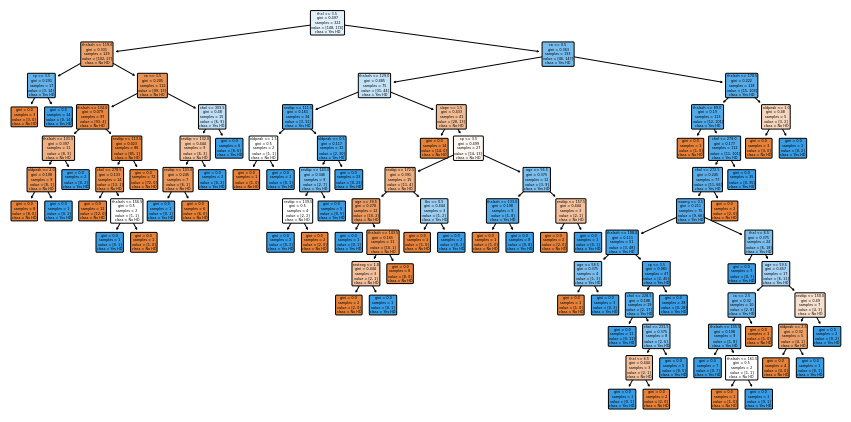

In [27]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=["No HD","Yes HD"],
         feature_names=X.columns);

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [29]:
print(confusion_matrix(y_test,clf_dt.predict(X_test)))

[[53 14]
 [ 6 35]]


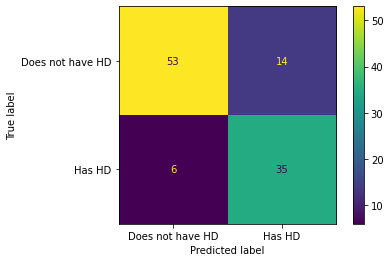

In [30]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['Does not have HD','Has HD'])

In [31]:
print("Decision Trees(DT) overfit training datasets. Functions like max_depth and min_samples usually used to minimize this overfit.") 

print("However, pruning a tree with a cost complexity pruning(ccp) can simplify the whole process of finding a smaller tree that improves the accuracy with the Testing Dataset.") 

print("Pruining a DT is all about finding the right value for the pruning parameter alpha, which controls how little or how much pruning happens.") 

print("Note:We ommit maximum value of alpha because it would prune all leaves, leaving us with only a root instead of a tree.") 

Decision Trees(DT) overfit training datasets. Functions like max_depth and min_samples usually used to minimize this overfit.
However, pruning a tree with a cost complexity pruning(ccp) can simplify the whole process of finding a smaller tree that improves the accuracy with the Testing Dataset.
Pruining a DT is all about finding the right value for the pruning parameter alpha, which controls how little or how much pruning happens.
Note:We ommit maximum value of alpha because it would prune all leaves, leaving us with only a root instead of a tree.


In [32]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train)#determine values for alpha
ccp_alphas = path.ccp_alphas #Extract different values for alpha
ccp_alphas = ccp_alphas[:-1]#Exclude the maximum value for alpha
clf_dts = [] # create an array that we will put decision tree into
#Create decision tree per value for alpha and stoer it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)  

In [33]:
print("Graph the accuracy of the trees using the Training Dataset and the Testing Dataset as a function of alpha.")

Graph the accuracy of the trees using the Training Dataset and the Testing Dataset as a function of alpha.


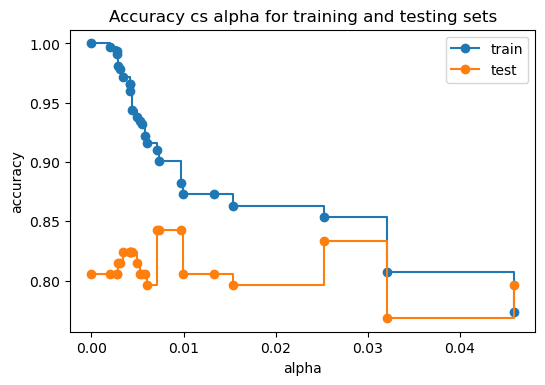

In [34]:
train_scores = [clf_dt.score(X_train, y_train)for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test)for clf_dt in clf_dts]
fig,ax = plt.subplots(dpi=100)
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title("Accuracy cs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train',drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test',drawstyle='steps-post')
ax.legend()
plt.show()

In [35]:
print("It can be seen that for alpha = 0.0075, the test and train datasets gives optimal accuracy.")  

It can be seen that for alpha = 0.0075, the test and train datasets gives optimal accuracy.


In [36]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0075)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0075, random_state=0)

In [37]:
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.8425925925925926

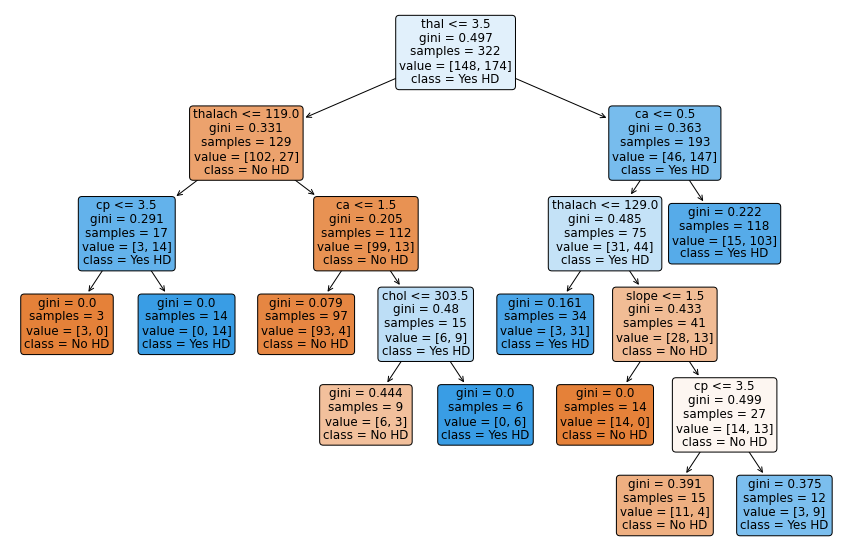

In [38]:
plt.figure(figsize=(15,10))
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=["No HD","Yes HD"],
         feature_names=X.columns);

In [39]:
clf_dt.predict([[62,0,1,130,236,0,0,174,0,0,1,1,2]])

array([0])

In [40]:
# import pickle 
# pickle.dump(clf,open('model_heart.pkl','wb'))